In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xgboost as xgb

In [4]:
import sklearn

from sklearn import datasets, model_selection, tree, dummy, metrics, linear_model, naive_bayes

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [5]:
import seaborn as sns
sns.set()


In [6]:
from scipy import stats

## Digits

In [7]:
digits = datasets.load_digits()

In [8]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [9]:
Xd = digits.data
yd = digits.target 

In [84]:
Xd.shape, yd.shape

((1797, 64), (1797,))

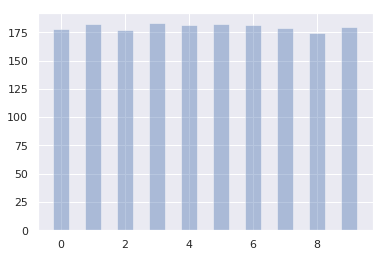

In [12]:
sns.distplot(yd, bins=np.arange(11), kde=False, hist_kws={'rwidth':0.5, 'align':'left'})

In [80]:
def plot_pixel_distribution(X):
        
    fig, axis = plt.subplots(8, 8, figsize=(20, 20))

    for feature in range(64):
        ax = sns.distplot(X[:, feature], bins=np.arange(17),
                          kde=False, norm_hist=True,
                          hist_kws={'rwidth':0.8, 'align':'left'},
                          ax=axis.ravel()[feature])
        
#         ax.set_title('pixel {}'.format(feature), position=(0.5, 0.8))
#         ax.set_yticks([])
#         plt.tight_layout()

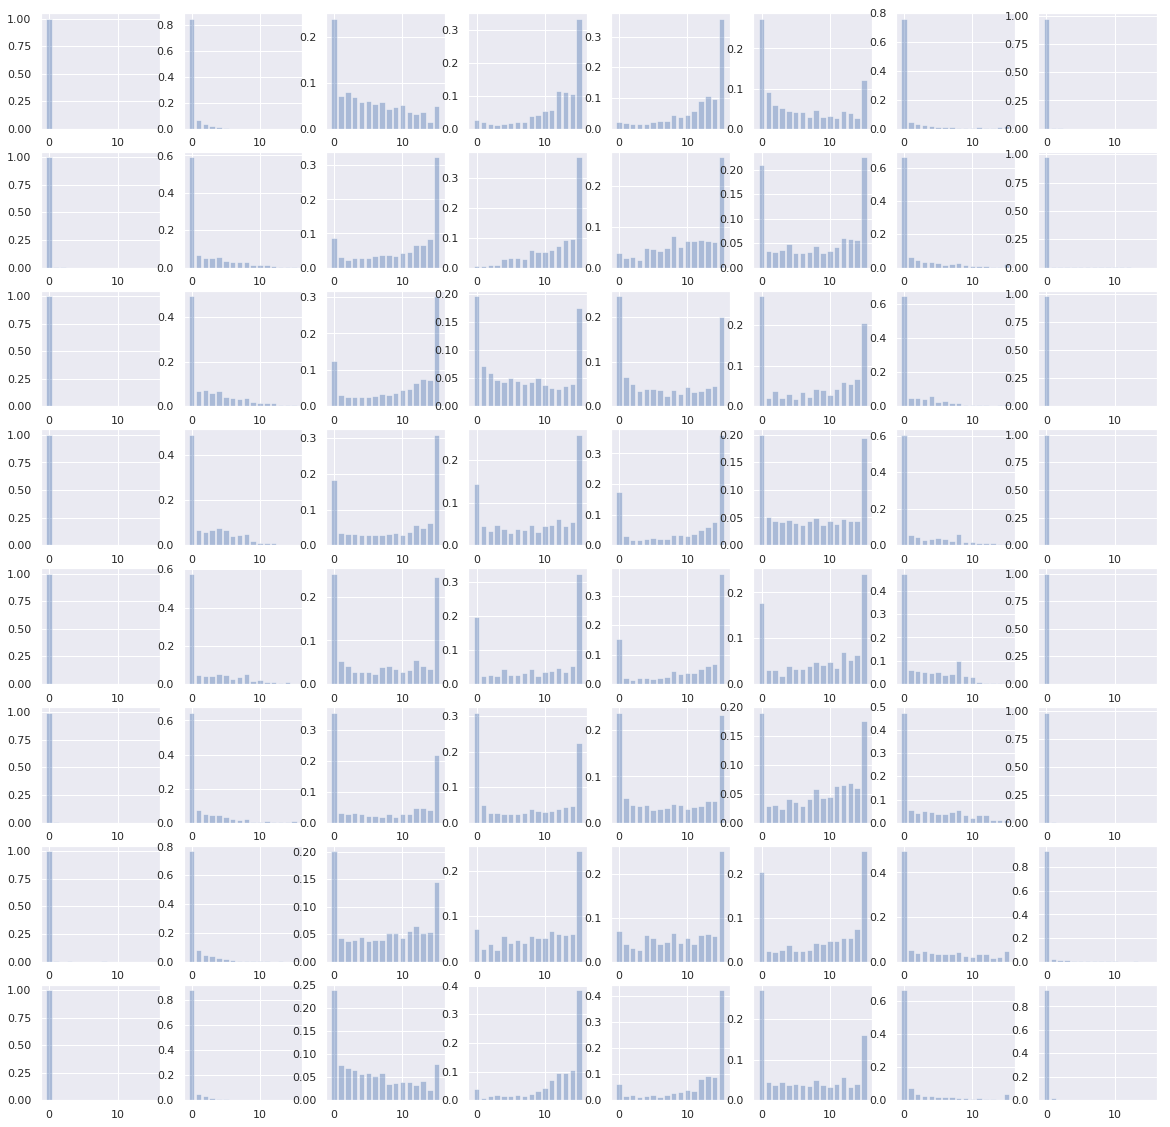

In [81]:
plot_pixel_distribution(Xd)

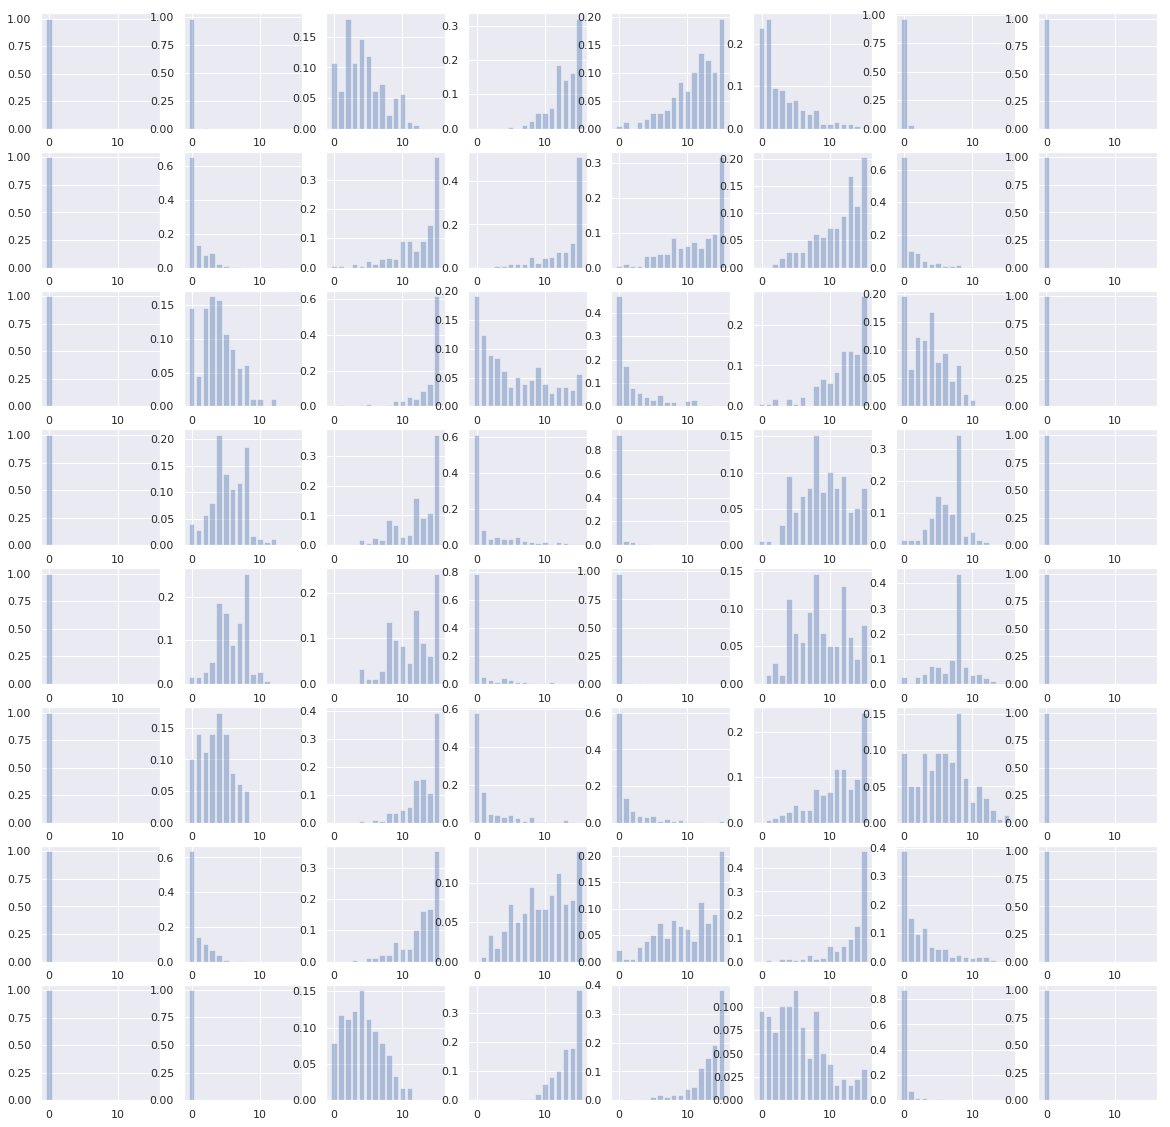

In [82]:
plot_pixel_distribution(Xd[yd==0])

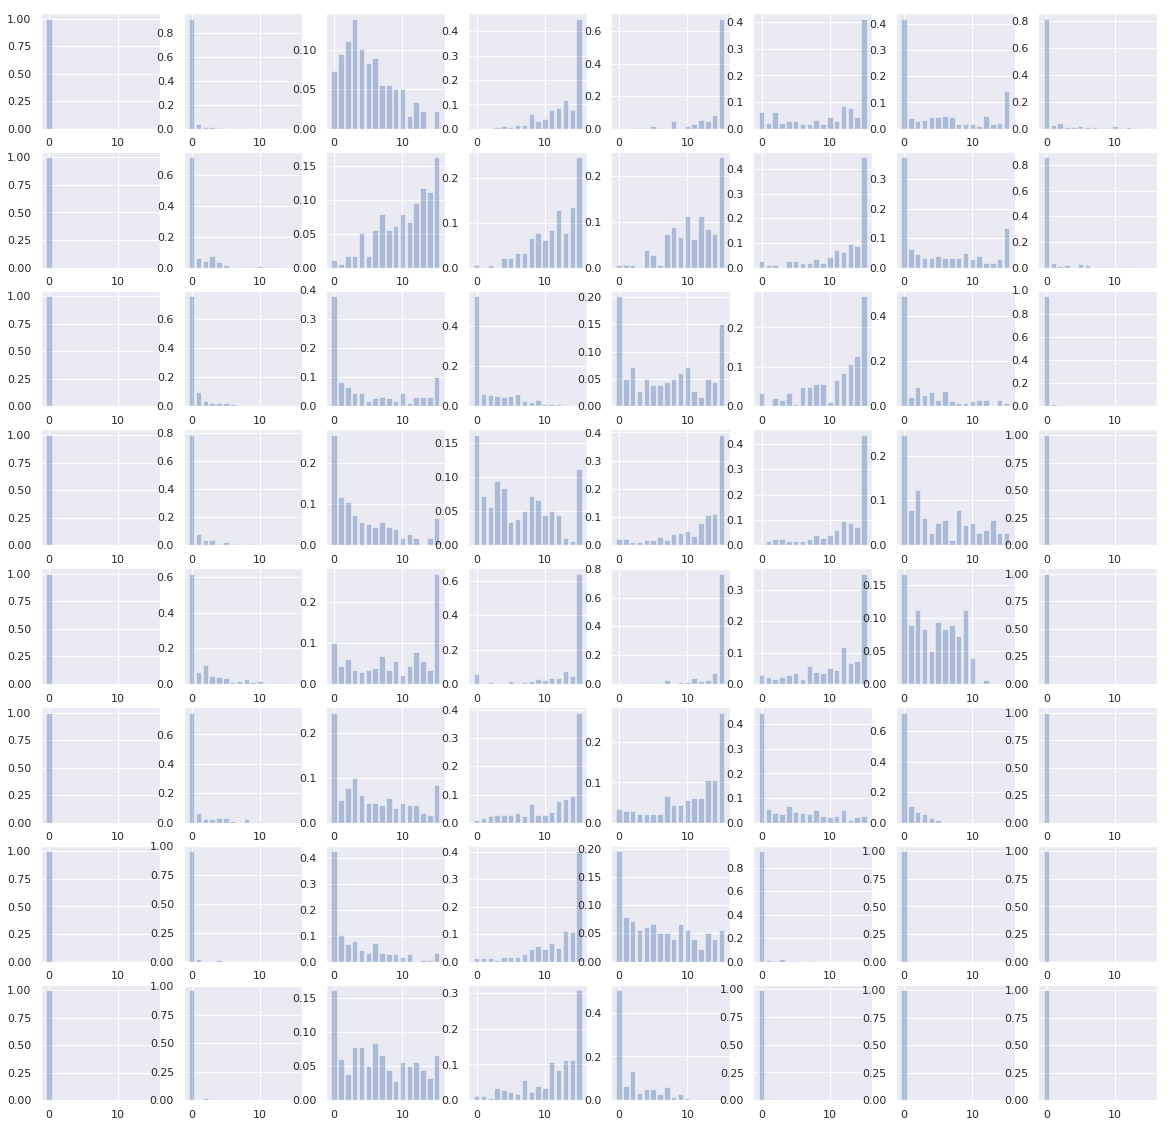

In [83]:
plot_pixel_distribution(Xd[yd==7])

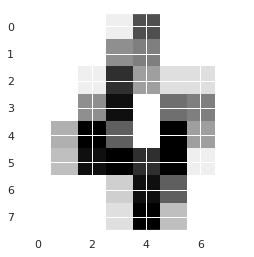

In [35]:
plt.imshow(Xd[4, :].reshape(8, 8), cmap=plt.cm.gray_r, origin='upper')

In [32]:
Xd[4, :].reshape(8, 8)

array([[ 0.,  0.,  0.,  1., 11.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  8.,  0.,  0.,  0.],
       [ 0.,  0.,  1., 13.,  6.,  2.,  2.,  0.],
       [ 0.,  0.,  7., 15.,  0.,  9.,  8.,  0.],
       [ 0.,  5., 16., 10.,  0., 16.,  6.,  0.],
       [ 0.,  4., 15., 16., 13., 16.,  1.,  0.],
       [ 0.,  0.,  0.,  3., 15., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  4.,  0.,  0.]])

### Gaussian Naive Bayes

In [165]:
gnb = naive_bayes.GaussianNB()

In [166]:
gnb.fit(Xd, yd)

GaussianNB(priors=None)

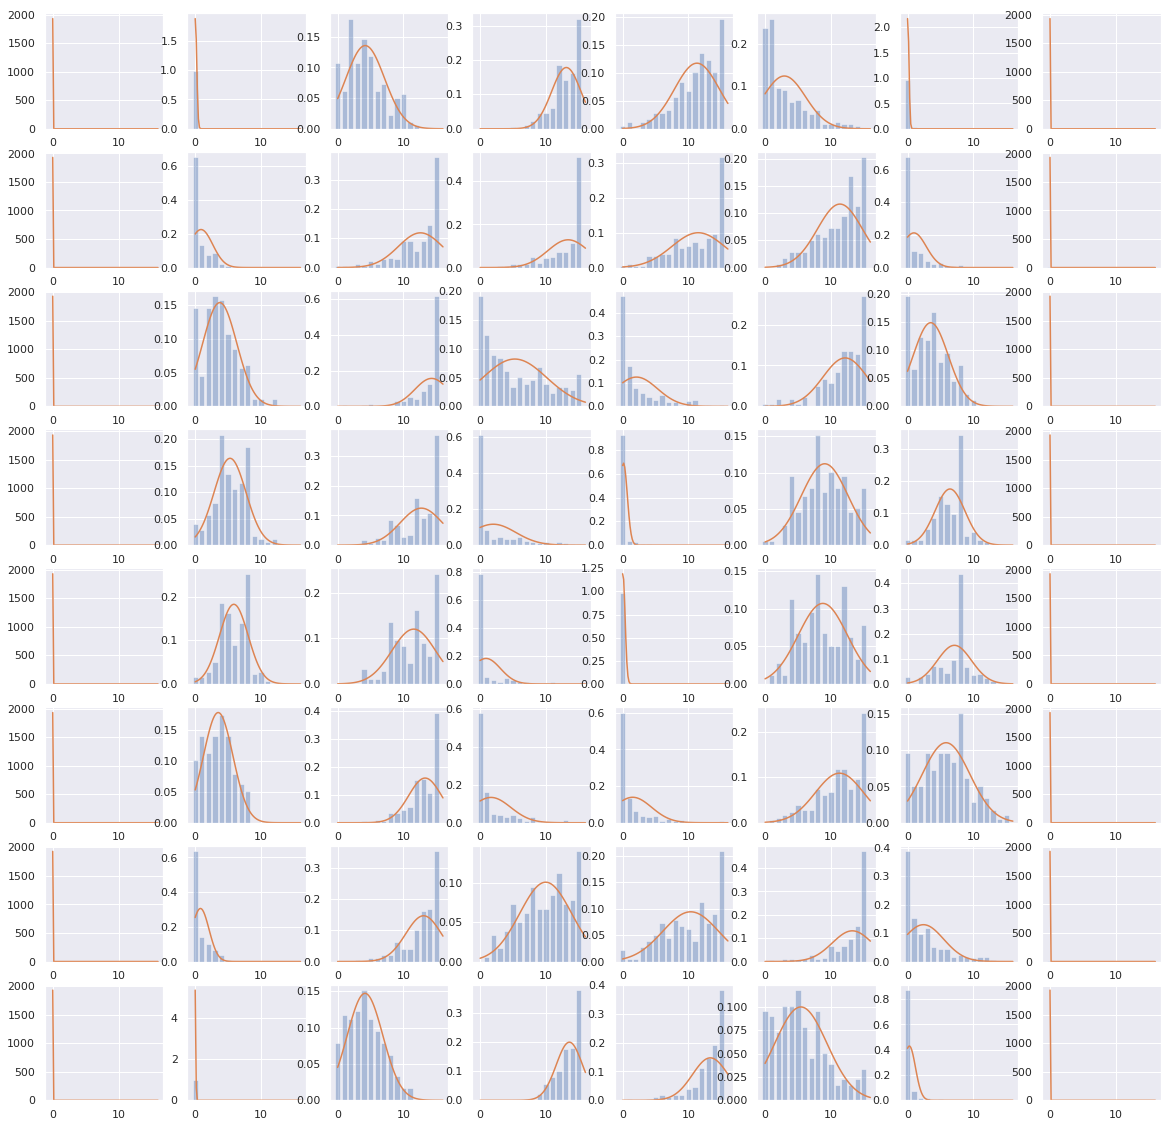

In [167]:
plt.figure(figsize=(20, 20))

digit = 0
digit_mask = yd == digit

for feature in range(64):
    plt.subplot(8, 8, feature + 1)
    sns.distplot(Xd[digit_mask, feature], bins=np.arange(17), kde=False, hist_kws={'rwidth':0.8, 'align':'left', 'density':True})
    
    plt.plot(x, stats.norm.pdf(x, gnb.theta_[digit, feature], np.sqrt(gnd.sigma_[digit, feature])))

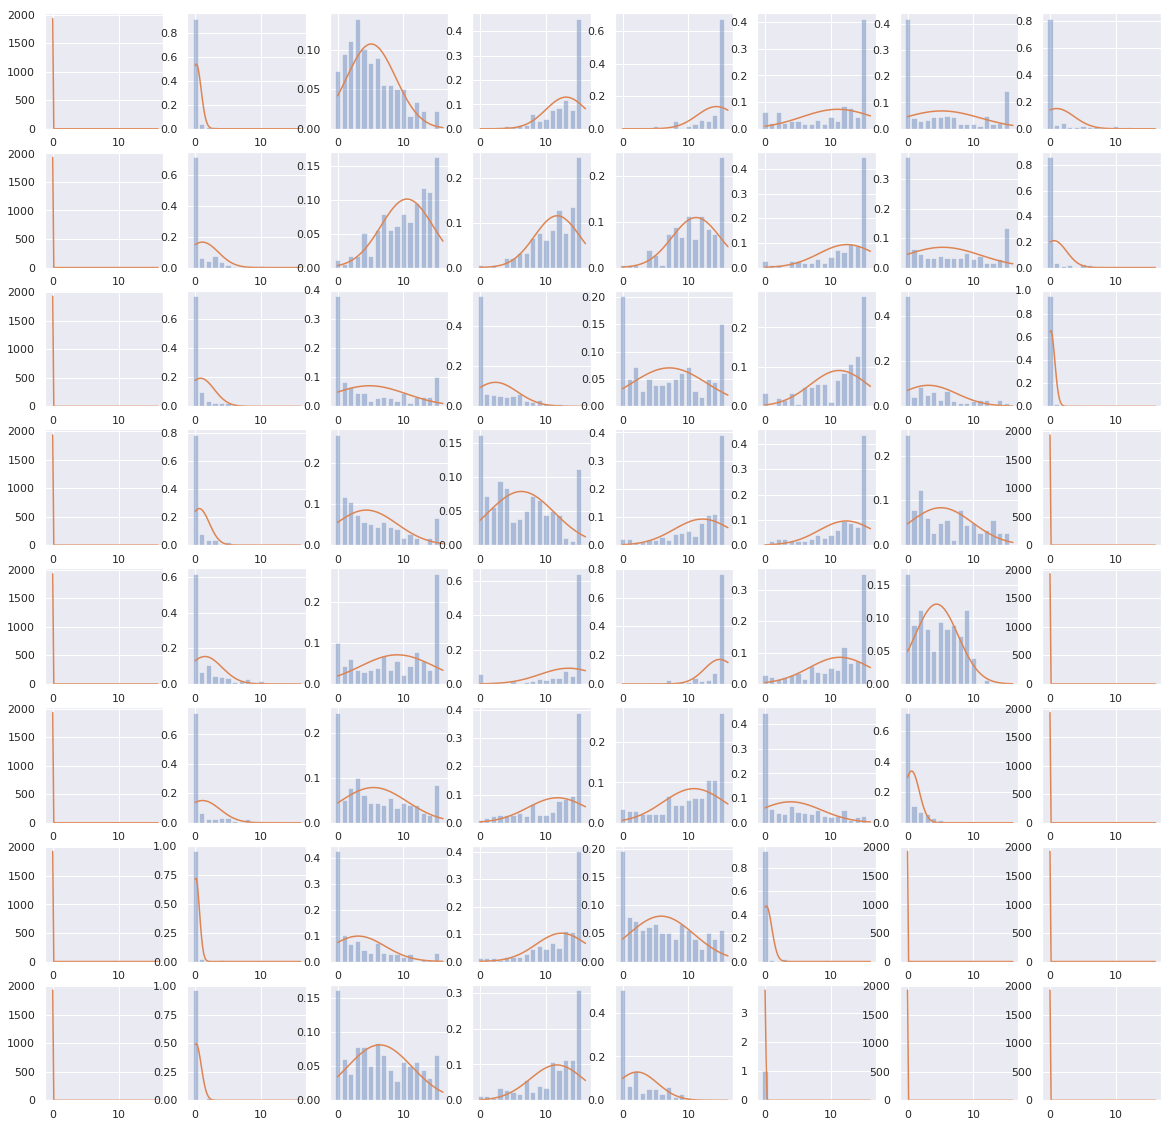

In [168]:
plt.figure(figsize=(20, 20))

digit = 7
digit_mask = yd == digit

for feature in range(64):
    plt.subplot(8, 8, feature + 1)
    sns.distplot(Xd[digit_mask, feature], bins=np.arange(17), kde=False, hist_kws={'rwidth':0.8, 'align':'left', 'density':True})
    
    plt.plot(x, stats.norm.pdf(x, gnb.theta_[digit, feature], np.sqrt(gnd.sigma_[digit, feature])))

In [169]:
gnb_cv_score = model_selection.cross_val_score(gnb, Xd, yd)

In [171]:
gnb_cv_score.mean()

0.8186003803550138

### Multinomial Naive Bayesian

In [153]:
mnb = naive_bayes.MultinomialNB().fit(Xd, yd)

In [184]:
np.exp(mnb.feature_log_prob_)

array([[1.77056959e-05, 8.85284796e-05, 1.32084492e-02, 4.12896829e-02,
        3.56238602e-02, 9.24237327e-03, 1.23939871e-04, 1.77056959e-05,
        1.77056959e-05, 2.81520565e-03, 3.96607589e-02, 4.21572620e-02,
        3.62435596e-02, 3.58717399e-02, 3.06308539e-03, 1.77056959e-05,
        1.77056959e-05, 1.17742878e-02, 4.50078790e-02, 1.66079428e-02,
        6.63963597e-03, 3.83682431e-02, 1.11191770e-02, 1.77056959e-05,
        1.77056959e-05, 1.66964713e-02, 4.00856956e-02, 6.30322775e-03,
        4.60348094e-04, 2.85769932e-02, 2.03438446e-02, 1.77056959e-05,
        1.77056959e-05, 1.85201579e-02, 3.64383222e-02, 2.83291135e-03,
        1.59351263e-04, 2.76740027e-02, 2.24685281e-02, 1.77056959e-05,
        1.77056959e-05, 1.10306486e-02, 4.18916766e-02, 5.22318030e-03,
        4.85136068e-03, 3.56592716e-02, 1.84670408e-02, 1.77056959e-05,
        1.77056959e-05, 2.53191452e-03, 4.11657430e-02, 3.14099046e-02,
        3.26315976e-02, 4.17854424e-02, 7.63115494e-03, 1.770569

In [186]:
mnb.feature_count_

array([[0.000e+00, 4.000e+00, 7.450e+02, 2.331e+03, 2.011e+03, 5.210e+02,
        6.000e+00, 0.000e+00, 0.000e+00, 1.580e+02, 2.239e+03, 2.380e+03,
        2.046e+03, 2.025e+03, 1.720e+02, 0.000e+00, 0.000e+00, 6.640e+02,
        2.541e+03, 9.370e+02, 3.740e+02, 2.166e+03, 6.270e+02, 0.000e+00,
        0.000e+00, 9.420e+02, 2.263e+03, 3.550e+02, 2.500e+01, 1.613e+03,
        1.148e+03, 0.000e+00, 0.000e+00, 1.045e+03, 2.057e+03, 1.590e+02,
        8.000e+00, 1.562e+03, 1.268e+03, 0.000e+00, 0.000e+00, 6.220e+02,
        2.365e+03, 2.940e+02, 2.730e+02, 2.013e+03, 1.042e+03, 0.000e+00,
        0.000e+00, 1.420e+02, 2.324e+03, 1.773e+03, 1.842e+03, 2.359e+03,
        4.300e+02, 0.000e+00, 0.000e+00, 1.000e+00, 7.400e+02, 2.414e+03,
        2.372e+03, 9.680e+02, 4.900e+01, 0.000e+00],
       [0.000e+00, 2.000e+00, 4.470e+02, 1.676e+03, 1.894e+03, 1.106e+03,
        1.810e+02, 0.000e+00, 0.000e+00, 1.700e+01, 7.400e+02, 2.323e+03,
        2.538e+03, 1.537e+03, 2.190e+02, 0.000e+00, 2.000e+

In [180]:
mnb_cv_score = model_selection.cross_val_score(mnb, Xd, yd)

In [181]:
mnb_cv_score

array([0.8820598 , 0.85976628, 0.87080537])

In [182]:
mnb_cv_score.mean()

0.8708771489735053

### Bernoulli Naive Bayesian

In [187]:
bnb = naive_bayes.BernoulliNB().fit(Xd, yd)

In [249]:
bnb = naive_bayes.BernoulliNB()
bnb_cv_score = model_selection.cross_val_score(bnb, Xd, yd)

In [252]:
bnb_cv_score, bnb_cv_score.mean()

(array([0.83554817, 0.80467446, 0.83724832]), 0.8258236507780582)

In [259]:
param_grid = {'binarize' : np.arange(17)}

gridcv = model_selection.GridSearchCV(bnb, param_grid, return_train_score=True)

In [260]:
gridcv.fit(Xd, yd)

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'binarize': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [264]:
cv_results = pd.DataFrame(gridcv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_binarize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.004354,0.000267,0.001787,0.000106,0,{'binarize': 0},0.835548,0.804674,0.837248,0.825821,0.014969,11,0.879498,0.872287,0.868443,0.873409,0.004582
1,0.003685,0.000625,0.001382,0.000116,1,{'binarize': 1},0.840532,0.801336,0.823826,0.821925,0.016077,12,0.877824,0.882304,0.883430,0.881186,0.002421
2,0.003204,0.000267,0.001194,0.000051,2,{'binarize': 2},0.850498,0.799666,0.832215,0.827490,0.021043,10,0.882845,0.875626,0.883430,0.880634,0.003549
3,0.002743,0.000115,0.001084,0.000045,3,{'binarize': 3},0.855482,0.808013,0.847315,0.836950,0.020731,9,0.892887,0.886477,0.891757,0.890374,0.002793
4,0.002564,0.000054,0.001006,0.000030,4,{'binarize': 4},0.853821,0.836394,0.857383,0.849193,0.009166,6,0.892050,0.893155,0.890924,0.892043,0.000911
5,0.002416,0.000040,0.000960,0.000041,5,{'binarize': 5},0.875415,0.831386,0.872483,0.859766,0.020104,2,0.900418,0.904007,0.905079,0.903168,0.001993
6,0.002266,0.000015,0.000917,0.000025,6,{'binarize': 6},0.875415,0.833055,0.850671,0.853088,0.017399,4,0.899582,0.901503,0.903414,0.901499,0.001565
7,0.002193,0.000060,0.000879,0.000013,7,{'binarize': 7},0.877076,0.838063,0.859060,0.858097,0.015961,3,0.904603,0.898998,0.912573,0.905391,0.005570
8,0.002136,0.000041,0.000850,0.000020,8,{'binarize': 8},0.877076,0.863105,0.842282,0.860879,0.014292,1,0.902092,0.892321,0.916736,0.903716,0.010034
9,0.002102,0.000014,0.000848,0.000009,9,{'binarize': 9},0.853821,0.868114,0.827181,0.849750,0.016938,5,0.899582,0.883139,0.901749,0.894823,0.008309


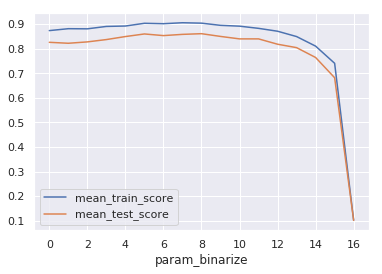

In [274]:
cv_results.plot(x='param_binarize', y=['mean_train_score', 'mean_test_score'])

In [277]:
gridcv.best_params_, gridcv.best_score_

({'binarize': 8}, 0.860879243183083)

In [278]:
model_selection.cross_val_score(gridcv.best_estimator_, Xd, yd)

array([0.87707641, 0.86310518, 0.84228188])

## Breast cancer

### Data loading and exploration

In [209]:
breastc = datasets.load_breast_cancer()

In [210]:
print(breastc.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [216]:
yb.shape, yb.dtype

((569,), dtype('int64'))

In [215]:
np.bincount(yb)

array([212, 357])

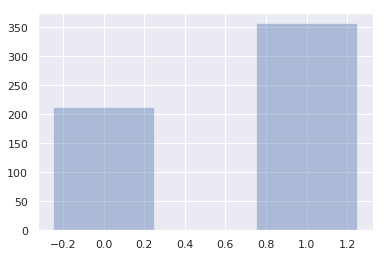

In [233]:
sns.distplot(yb, bins=np.array([0, 1, 2]) - 0.5, kde=False, hist_kws={'rwidth':0.5} )

In [211]:
Xb = breastc.data
yb = breastc.target 

In [234]:
Xb.shape, Xb.dtype

((569, 30), dtype('float64'))

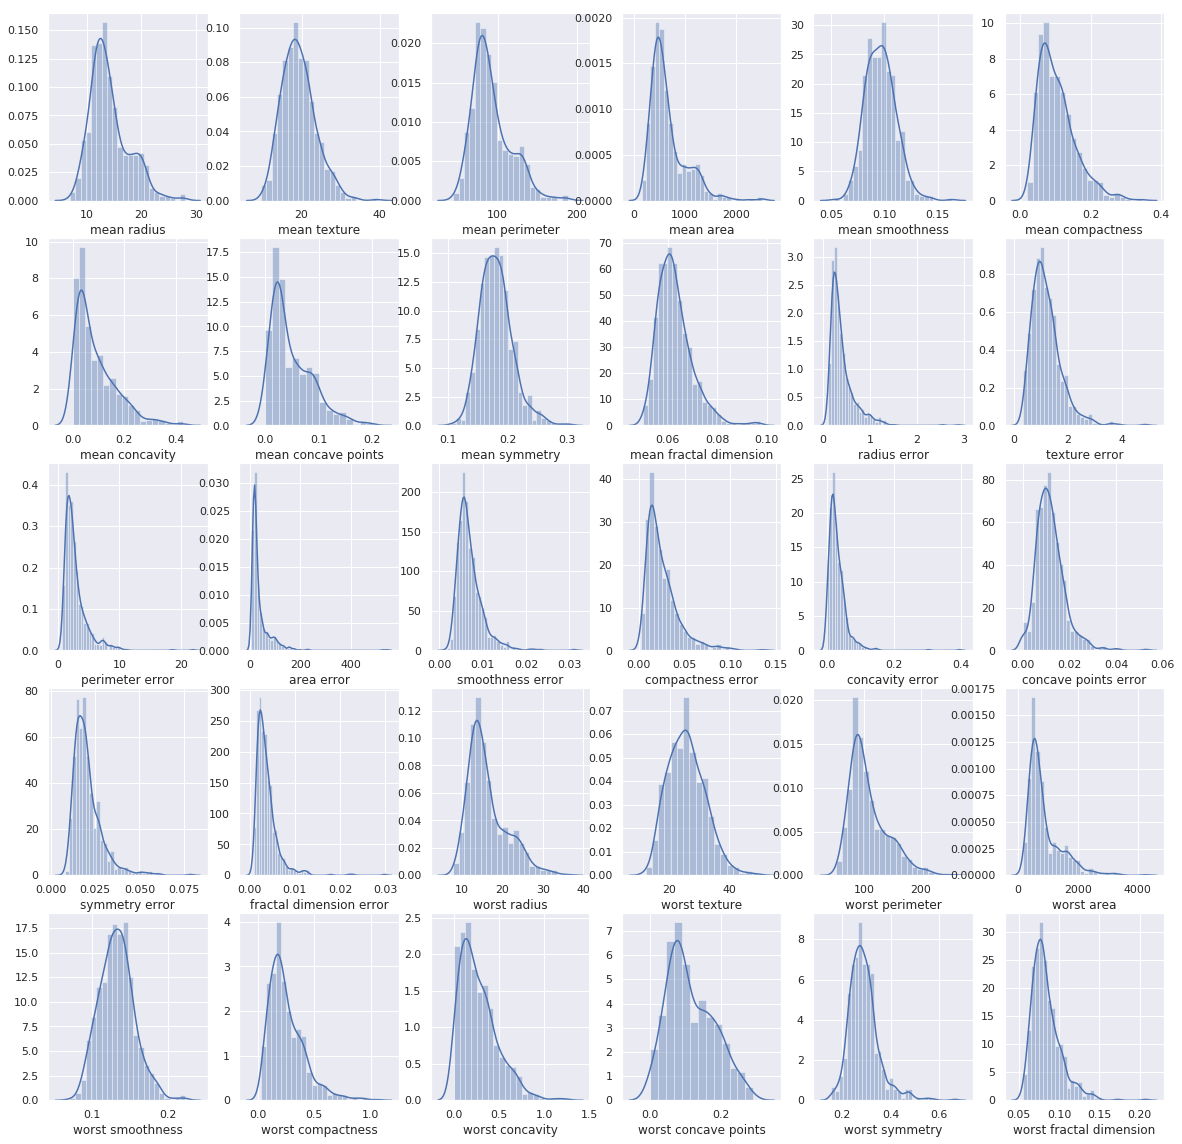

In [247]:
plt.figure(figsize=(20, 20))

for feature in range(Xb.shape[1]):
    plt.subplot(5, 6, feature + 1)
    sns.distplot(Xb[:, feature], kde=True, axlabel=breastc.feature_names[feature])

In [248]:
sns.pairplot(pd.DataFrame(Xb), )

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

### Bernoulli

In [235]:
bnb = naive_bayes.BernoulliNB(binarize=6)
bnb_cv_score = model_selection.cross_val_score(bnb, Xb, yb)

In [236]:
bnb_cv_score, bnb_cv_score.mean()

(array([0.67368421, 0.7       , 0.70899471]), 0.6942263065070082)

In [240]:
def cross_validate_estimator(est, X, y):
    cv_score = model_selection.cross_val_score(est, X, y)
    print(cv_score)
    print(cv_score.mean())

In [241]:
cross_validate_estimator(naive_bayes.GaussianNB(), Xb, yb)

[0.91578947 0.94736842 0.94708995]
0.9367492806089297


In [242]:
cross_validate_estimator(naive_bayes.MultinomialNB(), Xb, yb)

[0.87894737 0.89473684 0.91005291]
0.8945790401930752


In [243]:
cross_validate_estimator(naive_bayes.BernoulliNB(), Xb, yb)

[0.62631579 0.62631579 0.62962963]
0.6274204028589994


In [279]:
answer = '3, 4'